In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# -----------------------------------------------------------------------------
# Copyright (C) 2011  Nicolas P. Rougier
#
# All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are met:
#
# * Redistributions of source code must retain the above copyright notice, this
#   list of conditions and the following disclaimer.
#
# * Redistributions in binary form must reproduce the above copyright notice,
#   this list of conditions and the following disclaimer in the documentation
#   and/or other materials provided with the distribution.
#
# * Neither the name of the glumpy Development Team nor the names of its
#   contributors may be used to endorse or promote products derived from this
#   software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
# AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
# IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE
# ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE
# LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR
# CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF
# SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS
# INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN
# CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE)
# ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE
# POSSIBILITY OF SUCH DAMAGE.
#


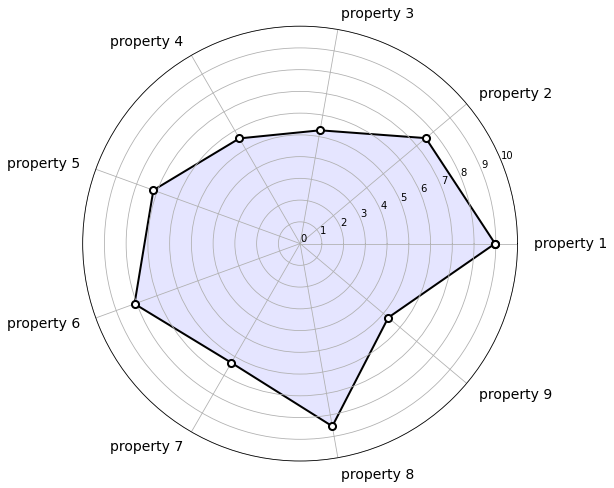

In [1]:
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Data to be represented
# ----------
properties = ['property 1', 'property 2', 'property 3', 
              'property 4', 'property 5', 'property 6',
              'property 7', 'property 8', 'property 9']
values = np.random.uniform(5,9,len(properties))
# ----------


# Choose some nice colors
matplotlib.rc('axes', facecolor = 'white')


# Make figure background the same colors as axes 
fig = plt.figure(figsize=(10,8), facecolor='white')

# Use a polar axes
axes = plt.subplot(111, polar=True)

# Set ticks to the number of properties (in radians)
t = np.arange(0,2*np.pi,2*np.pi/len(properties))
plt.xticks(t, [])

# Set yticks from 0 to 10
plt.yticks(np.linspace(0,10,11))


# Draw polygon representing values
points = [(x,y) for x,y in zip(t,values)]
points.append(points[0])
points = np.array(points)
codes = [path.Path.MOVETO,] + \
        [path.Path.LINETO,]*(len(values) -1) + \
        [ path.Path.CLOSEPOLY ]
_path = path.Path(points, codes)
_patch = patches.PathPatch(_path, fill=True, color='blue', linewidth=0, alpha=.1)
axes.add_patch(_patch)
_patch = patches.PathPatch(_path, fill=False, linewidth = 2)
axes.add_patch(_patch)


# Draw circles at value points
plt.scatter(points[:,0],points[:,1], linewidth=2,
            s=50, color='white', edgecolor='black', zorder=10)

# Set axes limits
plt.ylim(0,10)


# Draw ytick labels to make sure they fit properly
for i in range(len(properties)):
    angle_rad = i/float(len(properties))*2*np.pi
    angle_deg = i/float(len(properties))*360
    ha = "right"
    if angle_rad < np.pi/2 or angle_rad > 3*np.pi/2: ha = "left"
    plt.text(angle_rad, 10.75, properties[i], size=14,
             horizontalalignment=ha, verticalalignment="center")

    # A variant on label orientation
    #    plt.text(angle_rad, 11, properties[i], size=14,
    #             rotation=angle_deg-90,
    #             horizontalalignment='center', verticalalignment="center")


# Done
plt.savefig('radar-chart.png', facecolor='white')
plt.show()